In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm
import glob
import seaborn as sns
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
df = pd.read_excel('self_oriented_behaviours.xlsx') # result file needs to exist in working directory

In [3]:
aov = pg.rm_anova(dv='self oriented',
                  within=['CONDITION','DAY'],
                  subject='pigeon_id', data=df)
display(aov)

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,CONDITION,357.791667,2,14,178.895833,4.432926,0.032254,0.053551,0.387733,0.689762
1,DAY,606.562500,5,35,121.312500,4.281408,0.003833,0.017450,0.379510,0.586354
2,CONDITION * DAY,232.708333,10,70,23.270833,0.844670,0.587893,0.481260,0.107674,0.287542


In [4]:
df.pairwise_tukey(dv='self oriented', between='CONDITION').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,MIRROR,STRANGER,9.396,12.750,-3.354,1.256,-2.671,0.021,-0.541
1,MIRROR,WALL,9.396,9.417,-0.021,1.256,-0.017,0.900,-0.003
2,STRANGER,WALL,12.750,9.417,3.333,1.256,2.654,0.022,0.537


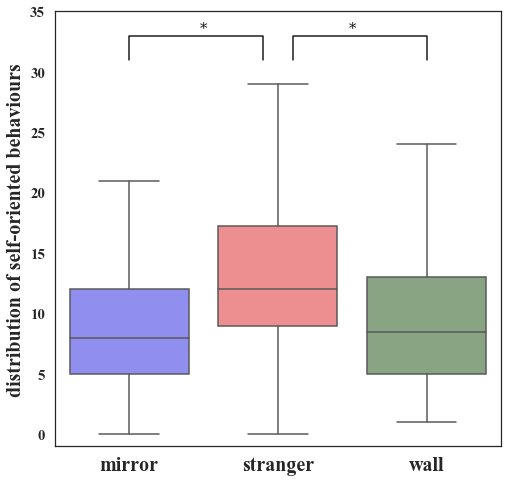

In [5]:
# Box plot visualization of self-oriented behaviours

sns.set_style(style='white')
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20

# Colors taken from other plots done with R
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))

a = sns.boxplot(x="CONDITION", y='self oriented', data=df,
               order=['MIRROR', 'STRANGER', 'WALL'], fliersize=0)

a.set_xlabel("")
a.set_ylabel("distribution of self-oriented behaviours")
a.set_xticklabels(['mirror','stranger','wall'])
a.set_ylim([-1, 35]) 

# statistical annotation
x1, x2 = 0, 1   # columns 'mirror' and 'stranger'
y, h, col = df['self oriented'].max() + 2, 2, 'k'
plt.rcParams["font.family"] = "serif"
plt.plot([x1, x1, x2-0.1, x2-0.1], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", fontsize=15, ha='center', va='bottom', color=col)

x2,x3 = 1, 2
y, h, col = df['self oriented'].max() + 2, 2, 'k'
plt.rcParams["font.family"] = "serif"
plt.plot([x2+0.1, x2+0.1, x3, x3], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x2+x3)*.5, y+h, "*", fontsize=15, ha='center', va='bottom', color=col)

display(a)